# Analiza Sentiment leksikona -Transformer



In [1]:

import pandas as pd

In [2]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [3]:
sent_an = pd.read_csv(RES_DIR + "srbsentiwordnet_a4.csv",  index_col=0)

In [4]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [5]:
sent_an

,ID,Lemme,Vrsta,Definicija,POS,NEG,OBJ
0,ENG30-03574555-n,ustanova,n,zgrada u koji se nalaziti organizacioni jedini...,0.000050,0.000092,0.999858
1,ENG30-07810907-n,začin,n,pripremljen dodatak jela za poboljšanje ukus,0.000127,0.000093,0.999780
2,ENG30-00721431-n,mesto,n,"u nečiji prilika , mogućnost",0.000055,0.003277,0.996668
3,ENG30-00473799-v,"obnoviti,doterati,uglancati,uljuditi",v,ostati jesam još samo da se doterati neki fine...,0.000069,0.000199,0.999731
4,ENG30-00903385-v,oprostiti,v,zapad on jesam oprostiti što se nekada računat...,0.000088,0.000142,0.999770
...,...,...,...,...,...,...,...
25315,ENG30-15266265-n,mandat,n,mandat predsednik,0.000364,0.000651,0.998985
25316,ENG30-15266685-n,sredina,n,vreme između početak i kraj vremenski perioda,0.000045,0.000093,0.999861
25317,ENG30-15266911-n,"gotovo,konac,kraj,prestanak,svršetak,završetak",n,tačka u vreme kada se nešto završavati,0.000049,0.000119,0.999832
25318,ENG30-15276642-n,"b/s,bitova u sekundi",n,( računarstvo ) brzina prenos podatak ( npr . ...,0.000048,0.000096,0.999856


In [6]:
pd.set_option('display.max_rows', None)

## Statistike

Raspored reči prema polaritetu 

In [7]:
# Define bin edges
bin_edges = [i/8 for i in range(9)]
bin_labels = [f"[{bin_edges[i]}, {bin_edges[i+1]})" for i in range(len(bin_edges)-1)]

# Function to bin data and get both count and percentage for each bin
def bin_data(column):
    binned_data = pd.cut(column, bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)
    counts = binned_data.value_counts().sort_index()
    percentages = (counts / counts.sum()) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Apply the function to each column and store results in a dictionary
results = {
    'OBJ': bin_data(sent_an['OBJ']),
    'POS': bin_data(sent_an['POS']),
    'NEG': bin_data(sent_an['NEG'])
}

results

{'OBJ':                Count  Percentage
 OBJ                             
 [0.0, 0.125)     201    0.793839
 [0.125, 0.25)    114    0.450237
 [0.25, 0.375)    344    1.358610
 [0.375, 0.5)     296    1.169036
 [0.5, 0.625)     499    1.970774
 [0.625, 0.75)    433    1.710111
 [0.75, 0.875)    965    3.811216
 [0.875, 1.0)   22468   88.736177,
 'POS':                Count  Percentage
 POS                             
 [0.0, 0.125)   23705   93.621643
 [0.125, 0.25)    787    3.108215
 [0.25, 0.375)    235    0.928120
 [0.375, 0.5)     252    0.995261
 [0.5, 0.625)      90    0.355450
 [0.625, 0.75)    136    0.537125
 [0.75, 0.875)     41    0.161927
 [0.875, 1.0)      74    0.292259,
 'NEG':                Count  Percentage
 NEG                             
 [0.0, 0.125)   23898   94.383886
 [0.125, 0.25)    493    1.947077
 [0.25, 0.375)    277    1.093997
 [0.375, 0.5)     232    0.916272
 [0.5, 0.625)     100    0.394945
 [0.625, 0.75)    171    0.675355
 [0.75, 0.875)     31    

In [8]:
sent_an[sent_an["POS"]>.9][["Lemme", "POS"]]

,Lemme,POS
845,"moralnost,pravičnost",0.921821
929,"slaviti,veličati,glorifikovati,uzdizati",0.929746
1018,voleti,0.907537
1053,"blaženstvo,sedmo nebo,deveto nebo",0.930773
2677,"razbludnost,pohota",0.926316
2725,srećan,0.932032
2778,karakter,0.930013
3155,"procvasti,procvetati,napredovati,prosperirati",0.907609
5239,važan,0.907915
5271,vrlina,0.918457


In [9]:
(sent_an["POS"]>.9).sum()

55

Raspored reči prema negativnom polaritetu 

In [10]:
sent_an[sent_an["NEG"]>.9][["Lemme", "NEG"]]

,Lemme,NEG
30,"smrskati,skršiti",0.958809
37,"oplakati,tugovati,jadikovati,ožaliti",0.966797
141,"nedaća,beda",0.952598
540,"udarac,udar,šok",0.960122
803,"probosti,žigati",0.958469
899,zaraditi,0.937852
985,"biti neugodan,biti uvredljiv,biti neprijatan",0.905841
1447,"opustiti,relaksirati",0.963599
1981,"održati se,stajati",0.922739
2496,"jad,tugovanje",0.944008


In [11]:
(sent_an["NEG"]>.9).sum()

106

Raspored reči prema objektivnosti 

In [12]:
sent_an["OBJ"].value_counts()

OBJ
0.814027    18
0.590705    10
0.809865     9
0.958157     8
0.999793     8
0.829215     7
0.958238     6
0.804551     6
0.999860     5
0.999868     5
0.999868     5
0.958238     4
0.999854     4
0.796398     4
0.814027     4
0.804551     4
0.958238     4
0.999868     4
0.999868     4
0.819712     4
0.796591     3
0.794509     3
0.600793     3
0.796294     3
0.999864     3
0.804551     3
0.788756     3
0.999866     3
0.829215     3
0.796591     3
0.999860     3
0.999860     3
0.858774     3
0.796591     3
0.999841     2
0.999355     2
0.999819     2
0.999860     2
0.627695     2
0.991372     2
0.435819     2
0.817352     2
0.999802     2
0.999867     2
0.804551     2
0.999860     2
0.999870     2
0.999870     2
0.999868     2
0.853936     2
0.999847     2
0.999865     2
0.796591     2
0.804551     2
0.999859     2
0.829215     2
0.999860     2
0.812473     2
0.999864     2
0.829215     2
0.717136     2
0.782497     2
0.998222     2
0.999846     2
0.999730     2
0.698360     2
0.9998

In [13]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<Axes: title={'center': 'POS'}>, <Axes: title={'center': 'NEG'}>],
       [<Axes: title={'center': 'OBJ'}>, <Axes: >]], dtype=object)

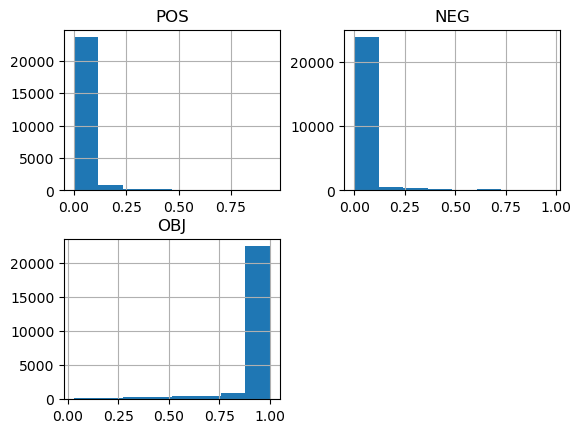

In [14]:
sent_an.hist(bins=8)

<Axes: >

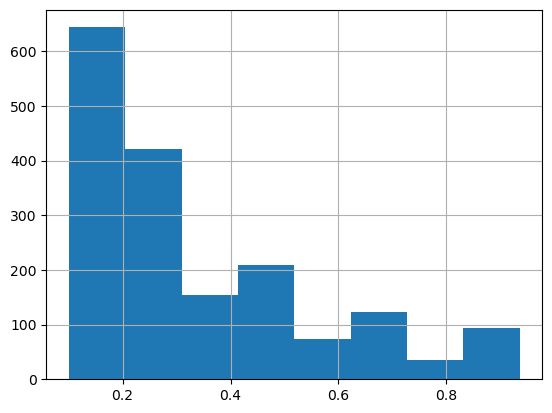

In [15]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<Axes: >

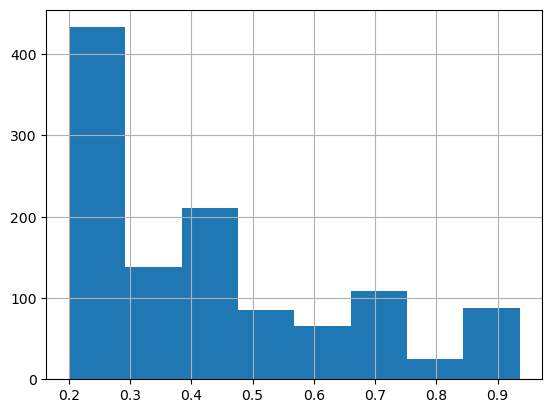

In [16]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<Axes: >

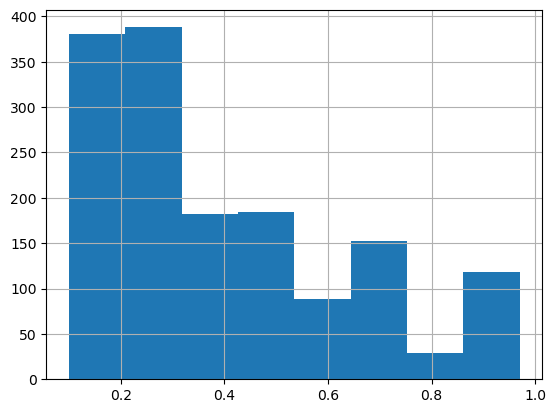

In [17]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<Axes: >

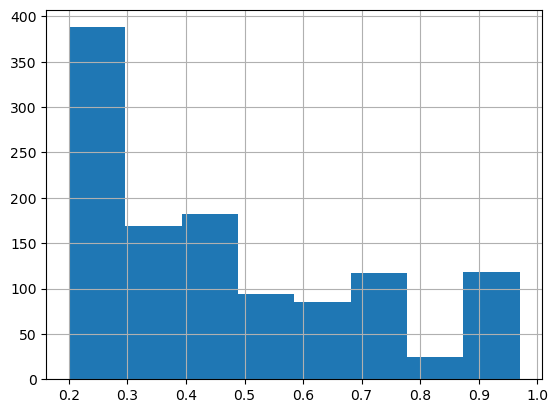

In [18]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [19]:
sent_an["Vrsta"].value_counts(sort=True)

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: ylabel='count'>

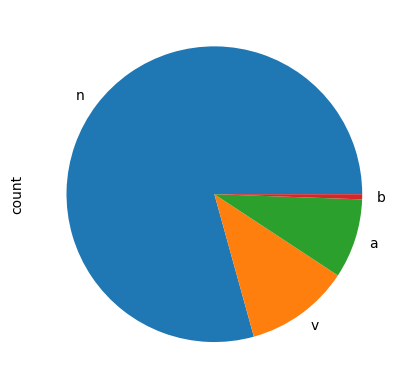

In [20]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

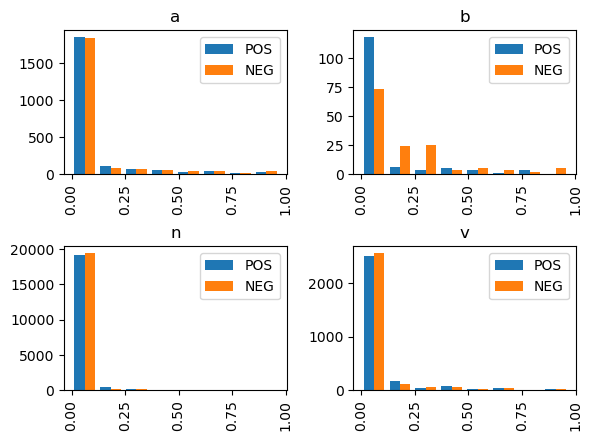

In [21]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

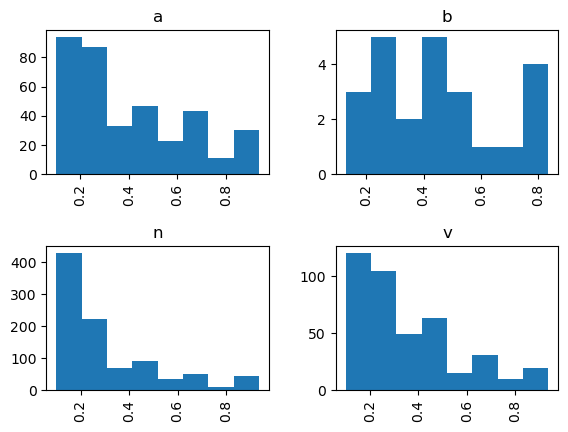

In [22]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

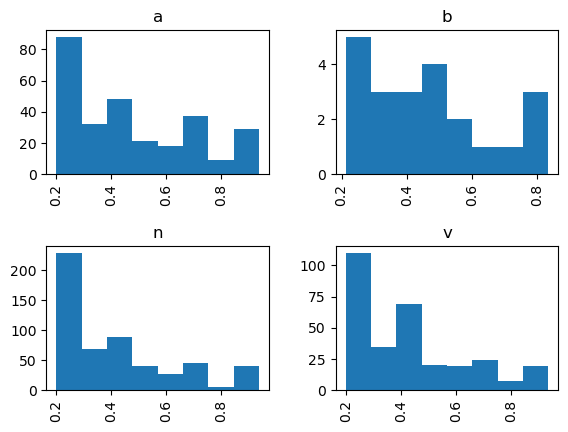

In [23]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

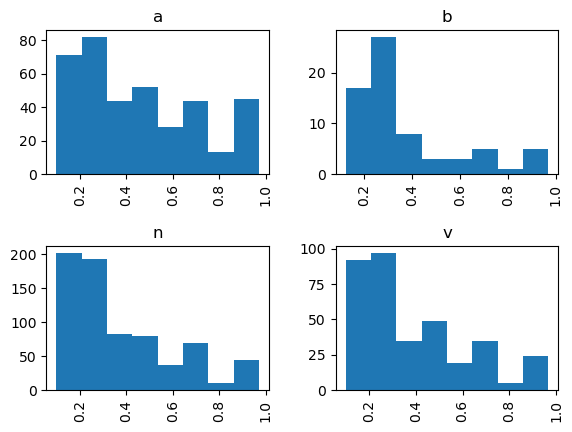

In [24]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

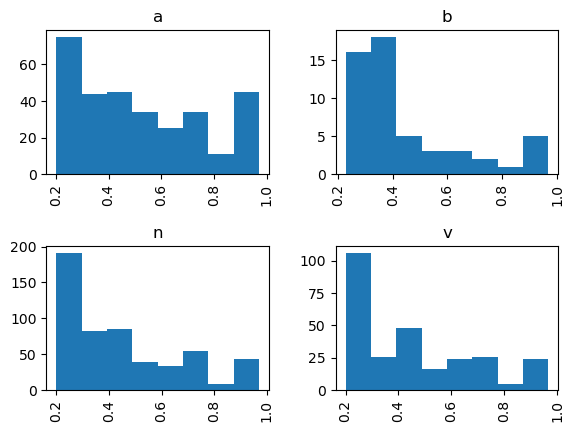

In [25]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

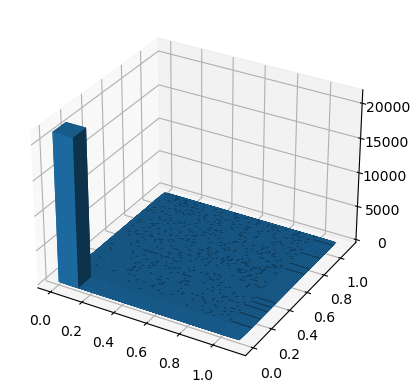

In [26]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<Axes: ylabel='count'>

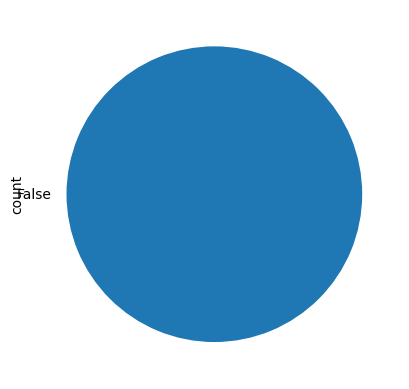

In [27]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

In [28]:
# srbsentiwordnet2.cvs
# srbsentiwordnet_a2.cvs